<font size="6"><b>Import Libraries</b></font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<font size="6"><b>Read Data</b></font>

In [3]:
train = pd.read_csv("Titanic.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font size="6"><b>Exploratory Data Analysis</b></font>

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font size="6"><b>Check for Nulls</b></font>

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

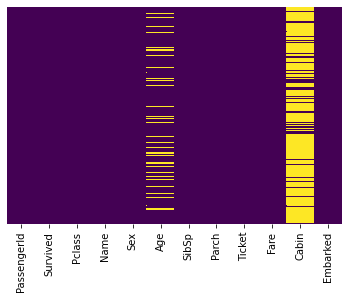

In [20]:
#The only columns with null values are "Age", "Cabin", and "Embarked".
#Creating a heatmap for visualization of the columns with null values.
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**"Age" has missing data.  "Cabin" has substantially more missing data.
**Missing data for "Embarked" not shown, as it only has 2 missing values.

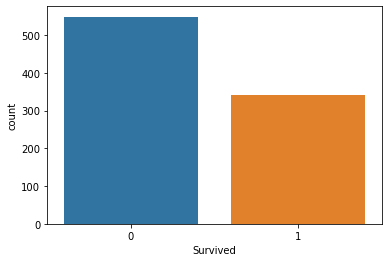

In [22]:
#Plot the count of survivors vs. non-survivors
sns.countplot(x="Survived", data=train)

In [24]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**342 people survived.  549 people did not. 

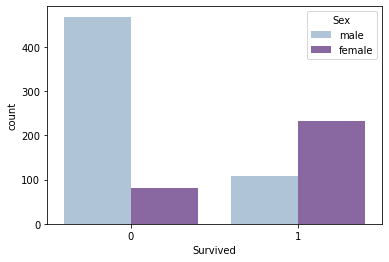

In [32]:
#Survivals by gender
sns.countplot(x="Survived", data=train, hue="Sex", palette = "BuPu")

In [41]:
train.groupby(["Survived","Sex"]).size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [42]:
#Replace missing values for "Age" with median
train["Age"].fillna(train["Age"].median(),inplace=True)

In [43]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**No more missing values for "Age"

In [44]:
#Of the 891 records, 687 of them are missing values for "Cabin".
#Good idea to drop "Cabin".
train.drop("Cabin",axis=1,inplace=True)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**"Cabin" has been removed.

In [46]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

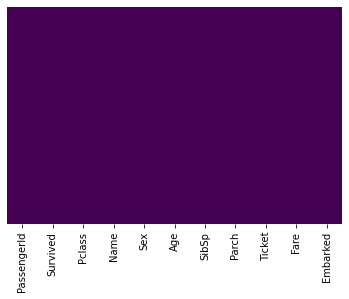

In [48]:
#Visualation for missing values again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [49]:
sex = pd.get_dummies(train["Sex"])

In [50]:
embark = pd.get_dummies(train["Embarked"])

In [51]:
pclass = pd.get_dummies(train["Pclass"])

In [52]:
train = pd.concat([train, sex, embark, pclass], axis = 1)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1,0,0,1


In [54]:
train.drop(["Sex","Embarked","Name","Ticket","Pclass"],axis=1,inplace=True)

In [55]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,5,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [56]:
X = train.drop("Survived",axis=1)
y = train["Survived"]

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression(solver="lbfgs", max_iter=1000)
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [62]:
test = pd.read_csv("Titanic_test.csv")

In [63]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [65]:
test["Age"].fillna(test["Age"].median(),inplace=True)

In [66]:
test["Pclass"].fillna(test["Pclass"].median(),inplace=True)

In [68]:
sex = pd.get_dummies(test["Sex"])
embark = pd.get_dummies(test["Embarked"])
pclass = pd.get_dummies(test["Pclass"])

In [69]:
test = pd.concat([test,sex,embark,pclass], axis=1)
test.drop(["Sex","Embarked","Name","Ticket","Pclass","Cabin"],axis=1,inplace=True)

In [70]:
test.columns

Index(['PassengerId',         'Age',       'SibSp',       'Parch',
              'Fare',      'female',        'male',           'C',
                 'Q',           'S',             1,             2,
                   3],
      dtype='object')

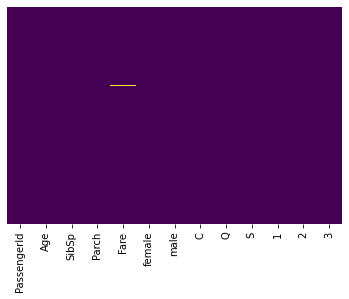

In [72]:
#Check test data for missing values
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [73]:
test["Fare"].fillna(test["Fare"].median(),inplace=True)

In [75]:
test.isnull().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
female         0
male           0
C              0
Q              0
S              0
1              0
2              0
3              0
dtype: int64

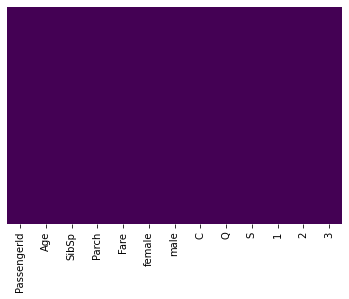

In [76]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [82]:
surv_prob = model.predict_proba(test)[:,1]

In [86]:
d = {"PassengerId": test["PassengerId"], "Survived": surv_prob * 100}
result = pd.DataFrame(d)

In [87]:
result.to_csv("Titanic_Surv_Prob.csv", index=False)

In [88]:
result

,PassengerId,Survived
0,892,11.226181
1,893,36.452718
2,894,13.174082
3,895,10.350626
4,896,57.053636
...,...,...
413,1305,10.777291
414,1306,94.447077
415,1307,7.334477
416,1308,10.780590
